In [1]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt,seaborn as sns
visa_df=pd.read_csv('Visadataset.csv')
Q1=round(np.percentile(visa_df['no_of_employees'], 25), 2)
Q3=round(np.percentile(visa_df['no_of_employees'], 75), 2)
IQR=Q3-Q1
LB= Q1-1.5*IQR
UB= Q3+1.5*IQR

con1=visa_df['no_of_employees']<LB
con2=visa_df['no_of_employees']>UB
outliers_data=visa_df[con1 | con2]

con3=visa_df['no_of_employees']>LB
con4=visa_df['no_of_employees']<UB
non_outliers_data=visa_df[con3 & con4]

visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [2]:
len(outliers_data)

1556

In [3]:
len(non_outliers_data)

23924

In [4]:
len(visa_df['no_of_employees'])

25480

(array([2.497e+04, 3.410e+02, 9.300e+01, 1.900e+01, 2.200e+01, 1.000e+01,
        1.300e+01, 5.000e+00, 2.000e+00, 5.000e+00]),
 array([-2.600000e+01,  6.018350e+04,  1.203930e+05,  1.806025e+05,
         2.408120e+05,  3.010215e+05,  3.612310e+05,  4.214405e+05,
         4.816500e+05,  5.418595e+05,  6.020690e+05]),
 <BarContainer object of 10 artists>)

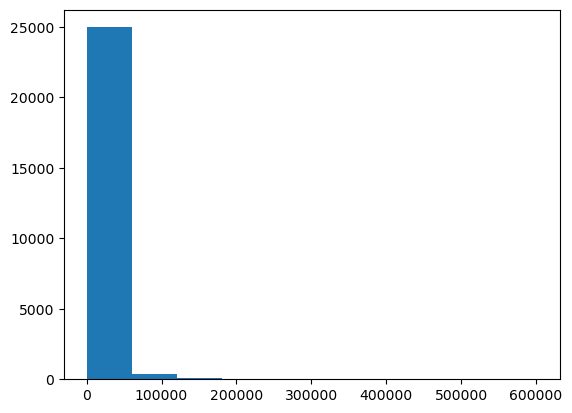

In [5]:
plt.hist(visa_df['no_of_employees'])

<Axes: >

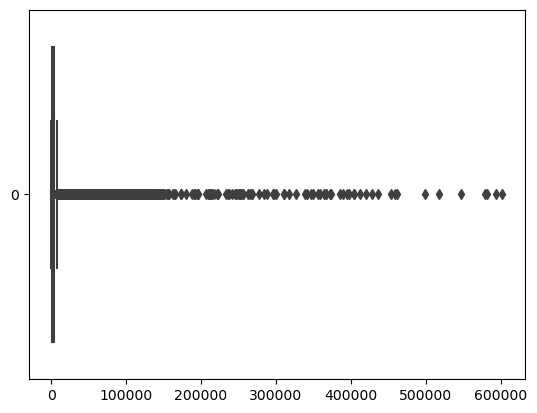

In [6]:
sns.boxplot(visa_df['no_of_employees'],orient='h')

(array([4359., 4342., 4204., 3625., 2859., 2052., 1434.,  711.,  269.,
          69.]),
 array([ -26. ,  696.1, 1418.2, 2140.3, 2862.4, 3584.5, 4306.6, 5028.7,
        5750.8, 6472.9, 7195. ]),
 <BarContainer object of 10 artists>)

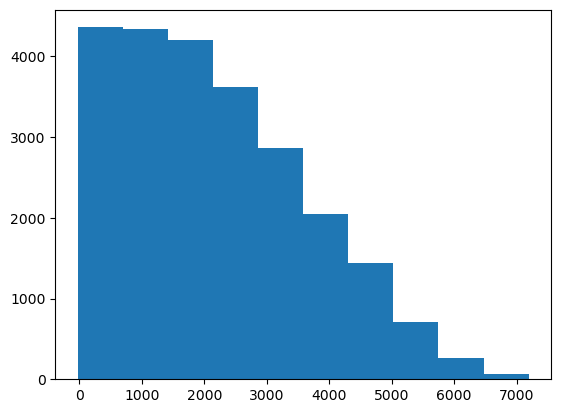

In [7]:
plt.hist(non_outliers_data['no_of_employees'])

(array([1078.,  328.,   75.,   19.,   21.,   10.,   13.,    5.,    2.,
           5.]),
 array([  7242. ,  66724.7, 126207.4, 185690.1, 245172.8, 304655.5,
        364138.2, 423620.9, 483103.6, 542586.3, 602069. ]),
 <BarContainer object of 10 artists>)

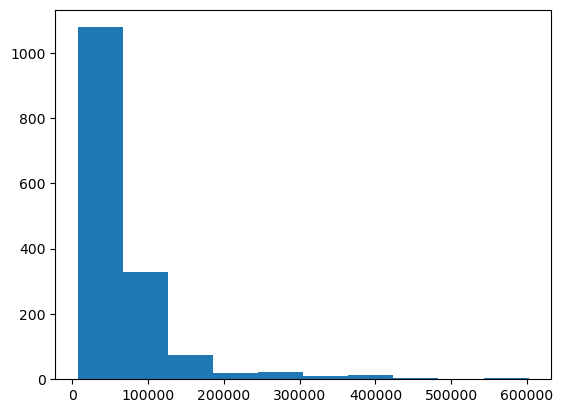

In [8]:
plt.hist(outliers_data['no_of_employees'])

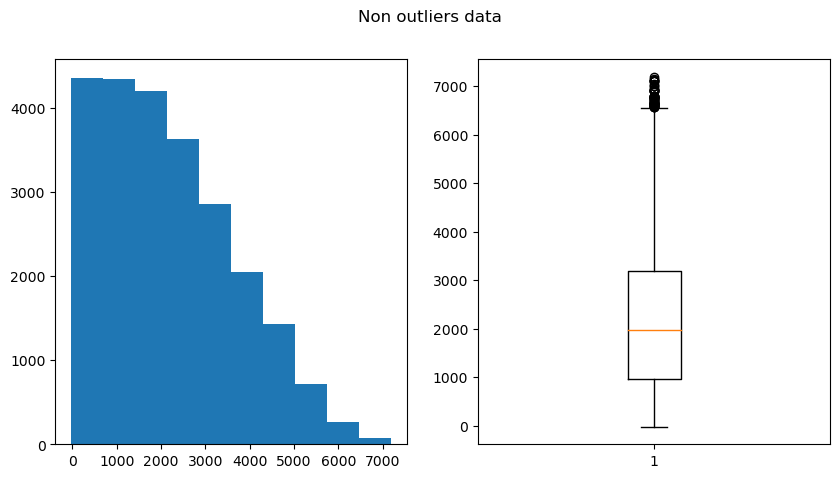

In [9]:
plt.figure(figsize=(10,5))
plt.suptitle('Non outliers data')
plt.subplot(1,2,1).hist(non_outliers_data['no_of_employees'])
plt.subplot(1,2,2).boxplot(non_outliers_data['no_of_employees'])
plt.show()

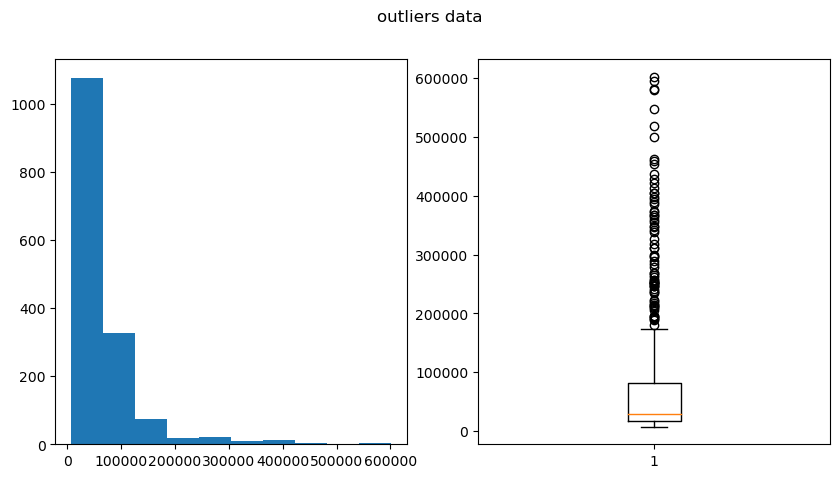

In [10]:
plt.figure(figsize=(10,5))
plt.suptitle('outliers data')
plt.subplot(1,2,1).hist(outliers_data['no_of_employees'])
plt.subplot(1,2,2).boxplot(outliers_data['no_of_employees'])
plt.show()

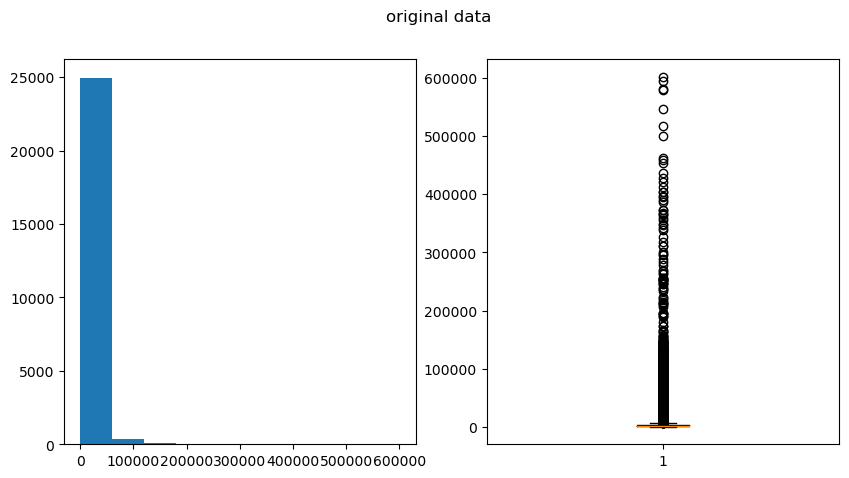

In [11]:
plt.figure(figsize=(10,5))
plt.suptitle('original data')
plt.subplot(1,2,1).hist(visa_df['no_of_employees'])
plt.subplot(1,2,2).boxplot(visa_df['no_of_employees'])
plt.show()

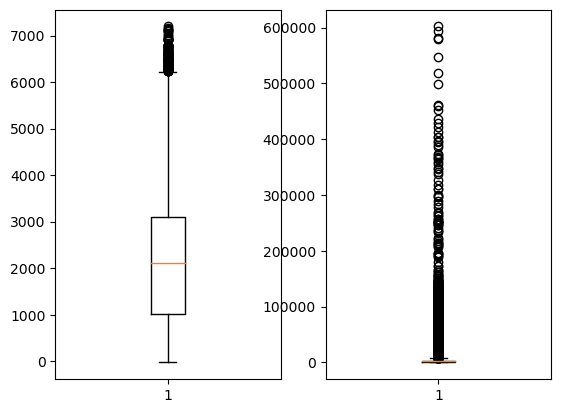

In [12]:
l1=[]
median = visa_df['no_of_employees'].median()
for value in visa_df['no_of_employees'].values:
    if value < LB or value > UB:
        l1.append(median)
    else:
        l1.append(value)
visa_df_copy = visa_df.copy()
visa_df_copy['no_of_employees'] = l1
plt.subplot(1,2,1).boxplot(visa_df_copy['no_of_employees'])
plt.subplot(1,2,2).boxplot(visa_df['no_of_employees'])
plt.show()